In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import missingno as msno

In [1]:
#Təsəvvür edin ki bizə gələn məlumatlar EXCEL formatında düzgün şəkildə yığışdırılmamışdır. Sıra-sıra analiz edərək sütunları yoxlayaq.

In [4]:
pd.set_option('display.max_columns', None ) # bütün sütunları görmək üçün istifadə olunur.

In [4]:
data = pd.read_csv(r'Hotel Reservations.csv')
data

C:\Users\MSI\AppData\Local\Temp\ipykernel_4068\517119927.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'Hotel Reservations.csv')


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00014,1,0,2,0,Meal Plan 1,0,Room_Type 1111111,$95.00,"$2,018.00",11.0,20,Online,0,0,0,^^^90,2,Canceled
1,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1111111,$1.00,"$2,018.00",2.0,28,Online,0,0,0,@'60,0,Canceled
2,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,$83.00,"$2,018.00",12.0,26,NaN,0,0,0,?105.61,1,Not_Canceled
3,INN00002,2,0,2,3,Not Selected,0,Room_Type 1111111,$5.00,"$2,018.00",11.0,6,Online,0,0,0,(106.68,1,Not_Canceled
4,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1111111,$346.00,"$2,018.00",9.0,13,NaN,0,0,0,&115,1,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN34992,2,0,0,1,Meal Plan 1,0,Room_Type 7,$0,"$2,017.00",11.0,5,Complementary,0,0,0,0.0,2,Not_Canceled
36271,INN35028,1,0,0,1,Meal Plan 1,0,Room_Type 1111111,$0,"$2,018.00",3.0,9,Complementary,1,0,3,0.0,1,Not_Canceled
36272,INN35470,1,0,0,1,Meal Plan 1,0,Room_Type 1111111,$0,"$2,017.00",9.0,8,Complementary,0,0,0,0.0,0,Not_Canceled
36273,INN35984,1,0,0,1,Meal Plan 1,0,Room_Type 7,$0,"$2,018.00",6.0,7,Complementary,1,4,17,0.0,1,Not_Canceled


In [5]:
data.describe(include = 'all') # data[['lead_time' ,'arrival_year','avg_price_per_room]]  
# qeyd olunan sütünlarda aşağıda göründüyü kimi düzgün formatda qeyd olunmayıb

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275,36275,36275,36269.000000,36275.000000,36270,36275.000000,36275.000000,36275.000000,36275.0,36275.000000,36275
unique,36275,NaN,NaN,NaN,NaN,4,NaN,7,352,2,NaN,NaN,5,NaN,NaN,NaN,3937.0,NaN,2
top,INN00014,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1111111,$0,"$2,018.00",NaN,NaN,Online,NaN,NaN,NaN,65.0,NaN,Not_Canceled
freq,1,NaN,NaN,NaN,NaN,27835,NaN,28130,1297,29761,NaN,NaN,23209,NaN,NaN,NaN,847.0,NaN,24390
mean,NaN,1.844962,0.105279,0.810724,2.204300,NaN,0.030986,NaN,NaN,NaN,7.423585,15.596995,NaN,0.025637,0.023349,0.153411,NaN,0.619655,NaN
std,NaN,0.518715,0.402648,0.870644,1.410905,NaN,0.173281,NaN,NaN,NaN,3.070014,8.740447,NaN,0.158053,0.368331,1.754171,NaN,0.786236,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN
25%,NaN,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,NaN,NaN,5.000000,8.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN
50%,NaN,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,NaN,NaN,8.000000,16.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN
75%,NaN,2.000000,0.000000,2.000000,3.000000,NaN,0.000000,NaN,NaN,NaN,10.000000,23.000000,NaN,0.000000,0.000000,0.000000,NaN,1.000000,NaN


In [6]:
data.info()  # İki sütun üzrə non-null mövcuddur.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8    lead_time                            36275 non-null  object 
 9    arrival_year                         36275 non-null  object 
 10  arrival_month                         36269 non-null  float64
 11  arrival_date   

In [7]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
 lead_time                              0
 arrival_year                           0
arrival_month                           6
arrival_date                            0
market_segment_type                     5
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [8]:
for i in data.columns:
    print(data[i].unique(), '\t' ,data[i].nunique())  
    

['INN00014' 'INN00003' 'INN00008' ... 'INN35470' 'INN35984' 'INN36081'] 	 36275
[1 2 0 3 4] 	 5
[ 0  2  1  3  9 10] 	 6
[2 1 0 3 4 5 6 7] 	 8
[ 0  1  3  2  4  7  5 10  8  6  9 11 17 12 13 15 14 16] 	 18
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3'] 	 4
[0 1] 	 2
['Room_Type 1111111' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6'
 'Room_Type 7' 'Room_Type 5' 'Room_Type 3'] 	 7
['$95.00 ' '$1.00 ' '$83.00 ' '$5.00 ' '$346.00 ' '$7.00 ' '$8.00 '
 '$224.00 ' '$35.00 ' '$21.00 ' '$173.00 ' '$43.00 ' '$28.00 ' '$6.00 '
 '$57.00 ' '$4.00 ' '$11.00 ' '$18.00 ' '$151.00 ' '$170.00 ' '$172.00 '
 '$22.00 ' '$26.00 ' '$10.00 ' '$24.00 ' '$16.00 ' '$29.00 ' '$36.00 '
 '$15.00 ' '$78.00 ' '$99.00 ' '$145.00 ' '$3.00 ' '$114.00 ' '$13.00 '
 '$0 ' '$119.00 ' '$71.00 ' '$111.00 ' '$50.00 ' '$44.00 ' '$2.00 '
 '$61.00 ' '$240.00 ' '$23.00 ' '$181.00 ' '$41.00 ' '$9.00 ' '$143.00 '
 '$46.00 ' '$142.00 ' '$39.00 ' '$20.00 ' '$17.00 ' '$31.00 ' '$76.00 '
 '$33.00 ' '$19.00 ' '$27.00 ' '$30.00 ' '$4

In [5]:
# data[['room_type_reserved','lead_time' ,'arrival_year','avg_price_per_room','market_segment_type','arrival_month']]  
# Qeyd olunan sütunlarda sətirlərdə yanlışlıqlar və boşluqlar var.

In [10]:
data.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', ' lead_time ', ' arrival_year ', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [11]:
data['room_type_reserved'].unique()  # Replace funksiyasını istifadə edərək 'room_type_reserved' sütunundakı 'Room_Type 1111111' dəyərini əvəz edəcəyik.

array(['Room_Type 1111111', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 7', 'Room_Type 5', 'Room_Type 3'], dtype=object)

In [12]:
data['room_type_reserved'] = (data['room_type_reserved'].str.replace('Room_Type 1111111','Room_Type 1'))
data['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 7', 'Room_Type 5', 'Room_Type 3'], dtype=object)

In [50]:
data=data.rename(columns={' lead_time ':'lead_time'})

In [51]:
data=data.rename(columns={' arrival_year ':'arrival_year'})

In [52]:
# Gördüyünüz kimi, məlumatlar sütun adlarına baxdıqda düzgün formatda deyil, düzgün formatı biz tərəf tərəfindən gətiriləcək.
data['arrival_year'].unique() 

array(['$2,018.00 ', '$2,017.00 '], dtype=object)

In [53]:
data['lead_time'].unique() 

array(['$95.00 ', '$1.00 ', '$83.00 ', '$5.00 ', '$346.00 ', '$7.00 ',
       '$8.00 ', '$224.00 ', '$35.00 ', '$21.00 ', '$173.00 ', '$43.00 ',
       '$28.00 ', '$6.00 ', '$57.00 ', '$4.00 ', '$11.00 ', '$18.00 ',
       '$151.00 ', '$170.00 ', '$172.00 ', '$22.00 ', '$26.00 ',
       '$10.00 ', '$24.00 ', '$16.00 ', '$29.00 ', '$36.00 ', '$15.00 ',
       '$78.00 ', '$99.00 ', '$145.00 ', '$3.00 ', '$114.00 ', '$13.00 ',
       '$0 ', '$119.00 ', '$71.00 ', '$111.00 ', '$50.00 ', '$44.00 ',
       '$2.00 ', '$61.00 ', '$240.00 ', '$23.00 ', '$181.00 ', '$41.00 ',
       '$9.00 ', '$143.00 ', '$46.00 ', '$142.00 ', '$39.00 ', '$20.00 ',
       '$17.00 ', '$31.00 ', '$76.00 ', '$33.00 ', '$19.00 ', '$27.00 ',
       '$30.00 ', '$48.00 ', '$150.00 ', '$14.00 ', '$32.00 ', '$66.00 ',
       '$84.00 ', '$12.00 ', '$25.00 ', '$40.00 ', '$51.00 ', '$139.00 ',
       '$70.00 ', '$34.00 ', '$211.00 ', '$45.00 ', '$101.00 ',
       '$136.00 ', '$86.00 ', '$100.00 ', '$178.00 ', '$85.00 ',
   

In [54]:
data['lead_time'].apply(type).unique()

array([<class 'str'>], dtype=object)

In [55]:
data['arrival_year'].apply(type).unique()

array([<class 'str'>], dtype=object)

In [56]:
data['arrival_year'] = (data['arrival_year'].str.replace(r'[^\d]', "")) 

C:\Users\MSI\AppData\Local\Temp\ipykernel_23060\295262640.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['arrival_year'] = (data['arrival_year'].str.replace(r'[^\d]', ""))


In [57]:
data['arrival_year'] = (data['arrival_year'].str.replace('00',''))

In [58]:
data['lead_time'] = (data['lead_time'].str.replace(r'[^\d]', ""))

C:\Users\MSI\AppData\Local\Temp\ipykernel_23060\2941592828.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['lead_time'] = (data['lead_time'].str.replace(r'[^\d]', ""))


In [59]:
data['lead_time'] = (data['lead_time'].str.replace('00',''))

In [60]:
# Alternativ variant kimi, lambda funksiyası və apply metodu istifadə edərək edə bilərsiniz:

# data['lead_time'] = data['lead_time'].apply(lambda x: x.replace(r'[^\d]', '').replace('00',''))
# data['arrival_year'] = data['arrival_year'].apply(lambda x: x.replace(r'[^\d]','').replace('00', ''))

In [61]:
# Qeyd edim ki strip metodu burada işləmir, çünki $ simvol deyil, Excel-də özü bir formatdır.

In [62]:
# ^ - "istisna" deməydi
# \d - ümümi rəqəm demeydi
# [^\d] - məsələn yalnız  rəqəmlər istisna olaraq , əvəz edəcək

In [63]:
data['arrival_year'] = data['arrival_year'].astype(int) # (str) formatdan (int) transfer edirik


In [64]:
data['lead_time'] = data['lead_time'].astype(int) # (str) formatdan (int) transfer edirik

In [65]:
data['arrival_year'].unique()

array([2018, 2017])

In [66]:
data['lead_time'].unique()  # Beləliklə, sütun sütun məlumatlar düzgün formatda əks olunur.

array([ 95,   1,  83,   5, 346,   7,   8, 224,  35,  21, 173,  43,  28,
         6,  57,   4,  11,  18, 151, 170, 172,  22,  26,  10,  24,  16,
        29,  36,  15,  78,  99, 145,   3, 114,  13,   0, 119,  71, 111,
        50,  44,   2,  61, 240,  23, 181,  41,   9, 143,  46, 142,  39,
        20,  17,  31,  76,  33,  19,  27,  30,  48, 150,  14,  32,  66,
        84,  12,  25,  40,  51, 139,  70,  34, 211,  45, 101, 136,  86,
       178,  85,  68, 120,  67, 222,  82, 138, 155, 157, 148,  37,  42,
        56, 116, 109,  65,  64, 174, 144, 220, 169,  98, 215,  63, 125,
        54, 160,  38,  47,  52,  55,  58,  62,  73,  80,  88, 128, 110,
       103, 168,  60, 146, 123, 108,  49,  69,  77,  91, 112, 121, 122,
       124, 134, 158, 159, 176, 253, 280, 137,  59, 296, 126, 140, 149,
       141, 130,  53, 163,  79,  96,  81, 113, 153, 154, 325, 102, 107,
       118, 133, 193, 326,  87,  92, 183, 221,  74,  89, 104, 117, 161,
       188, 127,  97, 249, 152, 207, 179, 204,  75, 165, 132, 14

In [67]:
data['avg_price_per_room'].unique() # Gördüyünüz növbəti sütunda məlumatlara, əlavə olaraq simvollar əlavə olunub.

array(['^^^90', "@'60", '?105.61', ..., 1.0, 0.5, 0.0], dtype=object)

In [68]:
data['avg_price_per_room'].str.replace(r'[0-9]', "").unique() # Belə bir yolla hansı simvolların istifadə edildiyini görə bilərik

C:\Users\MSI\AppData\Local\Temp\ipykernel_23060\1072174960.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['avg_price_per_room'].str.replace(r'[0-9]', "").unique() # bele bir usulla biz görə bilərik hansı simvollar istifadə olunur


array(['^^^', "@'", '?.', '(.', '&', '#.', '#', '', '.', nan],
      dtype=object)

In [70]:
data['avg_price_per_room'] = data['avg_price_per_room'].str.replace(r'[^.\d]','') # qeyd: '.' silmirik, bu səbəbdən r'[^.\d]' bu şəkildə yazılıb

C:\Users\MSI\AppData\Local\Temp\ipykernel_23060\3075766071.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['avg_price_per_room'] = data['avg_price_per_room'].str.replace(r'[^.\d]','') # qeyd: '.' silmirik, bu səbəbdən r'[^.\d]' bu şəkildə yazılıb


In [33]:
data.isnull().sum()  # Gördüyünüz kimi 3507 NaN yarandı. Bunun səbəbini aşağıda ətraflı izah edəcəm.

Booking_ID                                 0
no_of_adults                               0
no_of_children                             0
no_of_weekend_nights                       0
no_of_week_nights                          0
type_of_meal_plan                          0
required_car_parking_space                 0
room_type_reserved                         0
lead_time                                  0
arrival_year                               0
arrival_month                              6
arrival_date                               0
market_segment_type                        5
repeated_guest                             0
no_of_previous_cancellations               0
no_of_previous_bookings_not_canceled       0
avg_price_per_room                      3507
no_of_special_requests                     0
booking_status                             0
dtype: int64

In [34]:
# Gördüyünüz kimi, [avg_price_per_room] sütununda Dtype:object kimi qeyd olunub. 
# Bu isə deməkdir ki, bir neçə tip istifadə oluna bilər (int, str, float, bool), yaxud məlumat həm rəqəmlərdən ibarətdir, 
# həm də həriflərdən.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int32  
 9   arrival_year                          36275 non-null  int32  
 10  arrival_month                         36269 non-null  float64
 11  arrival_date   

In [35]:
data['avg_price_per_room'].apply(type).value_counts() # Daha ətraflı şəkildə burda görə bilərik və qeyd olunan nüans çox önəmlidir.

<class 'str'>      32768
<class 'float'>     3507
Name: avg_price_per_room, dtype: int64

In [36]:
# Bu səbəbdən ilk öncə məlumatları 'string' formata çevirərək, strip və ya replace metodunu tətbiq edə bilərik.

In [69]:
data['avg_price_per_room'] = data['avg_price_per_room'].astype('string') # (float)(3507) formatdan (str) transfer edirik

In [71]:
data['avg_price_per_room'].apply(type).value_counts()

<class 'str'>    36275
Name: avg_price_per_room, dtype: int64

In [72]:
# data['avg_price_per_room'] = data ['avg_price_per_room'].str.strip(r'[^.\d]')

In [73]:
data['avg_price_per_room'] = data['avg_price_per_room'].str.replace(r'[^.\d]','')

C:\Users\MSI\AppData\Local\Temp\ipykernel_23060\1884144608.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['avg_price_per_room'] = data['avg_price_per_room'].str.replace(r'[^.\d]','')


In [74]:
data['avg_price_per_room'].str.replace(r'[0-9]','').unique() # Bu şəkildə görə bilərik ki, artıq bizə lazım olmayan simvollar sütununda hamısı silindi.

C:\Users\MSI\AppData\Local\Temp\ipykernel_23060\2122761498.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['avg_price_per_room'].str.replace(r'[0-9]','').unique() # bu şəkildə görməy olur ki artig bizə lazım olmayan simvollar sütünda hamısı silindi.


<StringArray>
['', '.']
Length: 2, dtype: string

In [75]:
data['avg_price_per_room'] = data['avg_price_per_room'].astype('float') # "str" transfer edirik "float"

In [76]:
data.info() # Artıq burada dəyişmiş 'Dtype' fərqini görə bilərik.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int32  
 9   arrival_year                          36275 non-null  int32  
 10  arrival_month                         36269 non-null  float64
 11  arrival_date   

In [77]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           6
arrival_date                            0
market_segment_type                     5
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [78]:
data['arrival_month'].value_counts().sort_index() # Gördüyünüz kimi sütun adından və verilən rəqəmlərdən analiz edərək, 
# başa düşürük ki, .mean metodunu tətbiq etməyimiz düzgün deyil.

1.0     1014
2.0     1704
3.0     2358
4.0     2735
5.0     2598
6.0     3202
7.0     2920
8.0     3812
9.0     4610
10.0    5315
11.0    2980
12.0    3021
Name: arrival_month, dtype: int64

In [79]:
data['arrival_month'] = data['arrival_month'].fillna(data['arrival_month'].mode()[0])

In [80]:
data['market_segment_type'] = data['market_segment_type'].fillna(data['market_segment_type'].mode()[0])

In [81]:
data.info() # Indi isə yoxlayaq, gördüyünüz kimi sütunlar düzgün formata gətirildi.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int32  
 9   arrival_year                          36275 non-null  int32  
 10  arrival_month                         36275 non-null  float64
 11  arrival_date   

In [82]:
for i in data.columns:
    print(data[i].apply(type).value_counts())

<class 'str'>    36275
Name: Booking_ID, dtype: int64
<class 'int'>    36275
Name: no_of_adults, dtype: int64
<class 'int'>    36275
Name: no_of_children, dtype: int64
<class 'int'>    36275
Name: no_of_weekend_nights, dtype: int64
<class 'int'>    36275
Name: no_of_week_nights, dtype: int64
<class 'str'>    36275
Name: type_of_meal_plan, dtype: int64
<class 'int'>    36275
Name: required_car_parking_space, dtype: int64
<class 'str'>    36275
Name: room_type_reserved, dtype: int64
<class 'int'>    36275
Name: lead_time, dtype: int64
<class 'int'>    36275
Name: arrival_year, dtype: int64
<class 'float'>    36275
Name: arrival_month, dtype: int64
<class 'int'>    36275
Name: arrival_date, dtype: int64
<class 'str'>    36275
Name: market_segment_type, dtype: int64
<class 'int'>    36275
Name: repeated_guest, dtype: int64
<class 'int'>    36275
Name: no_of_previous_cancellations, dtype: int64
<class 'int'>    36275
Name: no_of_previous_bookings_not_canceled, dtype: int64
<class 'float'>  

In [83]:
data.describe(include = 'all')  # Beləliklə, bizə verilən məlumatları tam olaraq düzgün formata gətirdik.

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275
unique,36275,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,2
top,INN00014,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,Not_Canceled
freq,1,NaN,NaN,NaN,NaN,27835,NaN,28130,NaN,NaN,NaN,NaN,23214,NaN,NaN,NaN,NaN,NaN,24390
mean,NaN,1.844962,0.105279,0.810724,2.204300,NaN,0.030986,NaN,84.719476,2017.820427,7.424011,15.596995,NaN,0.025637,0.023349,0.153411,103.423539,0.619655,NaN
std,NaN,0.518715,0.402648,0.870644,1.410905,NaN,0.173281,NaN,86.030757,0.383836,3.069939,8.740447,NaN,0.158053,0.368331,1.754171,35.089424,0.786236,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,2017.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,16.000000,2018.000000,5.000000,8.000000,NaN,0.000000,0.000000,0.000000,80.300000,0.000000,NaN
50%,NaN,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,56.000000,2018.000000,8.000000,16.000000,NaN,0.000000,0.000000,0.000000,99.450000,0.000000,NaN
75%,NaN,2.000000,0.000000,2.000000,3.000000,NaN,0.000000,NaN,126.000000,2018.000000,10.000000,23.000000,NaN,0.000000,0.000000,0.000000,120.000000,1.000000,NaN


In [ ]:
# EDA & Visualization

In [84]:
data['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

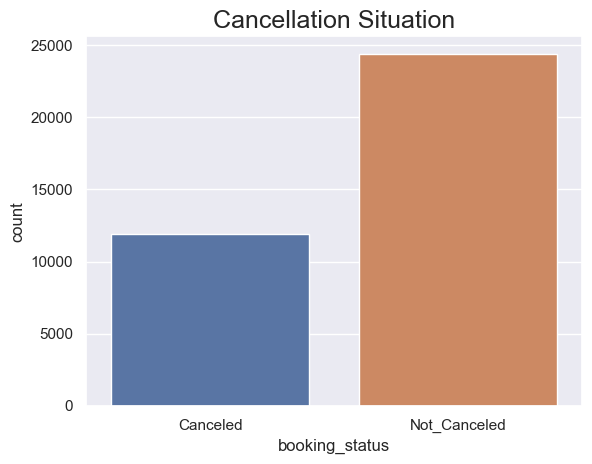

In [85]:
sns.countplot(x='booking_status' ,data = data)

plt.title("Cancellation Situation",fontsize=18);

<AxesSubplot:xlabel='room_type_reserved', ylabel='avg_price_per_room'>

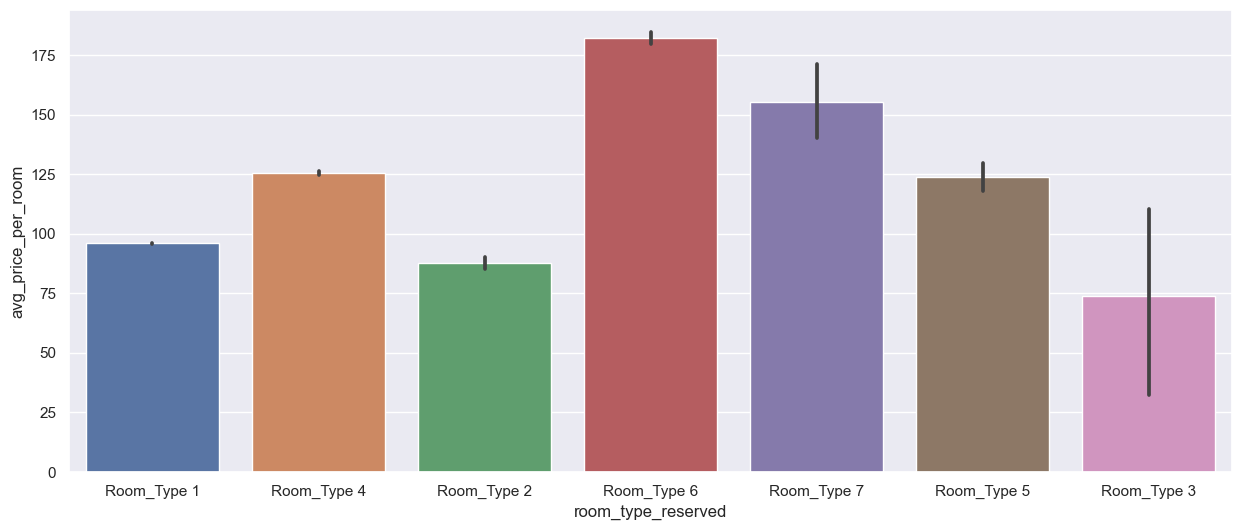

In [86]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'avg_price_per_room' , x = 'room_type_reserved' ,data = data)
# Gördüyünüz kimi, bu şəkildə sadə usuldı.

C:\Users\MSI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


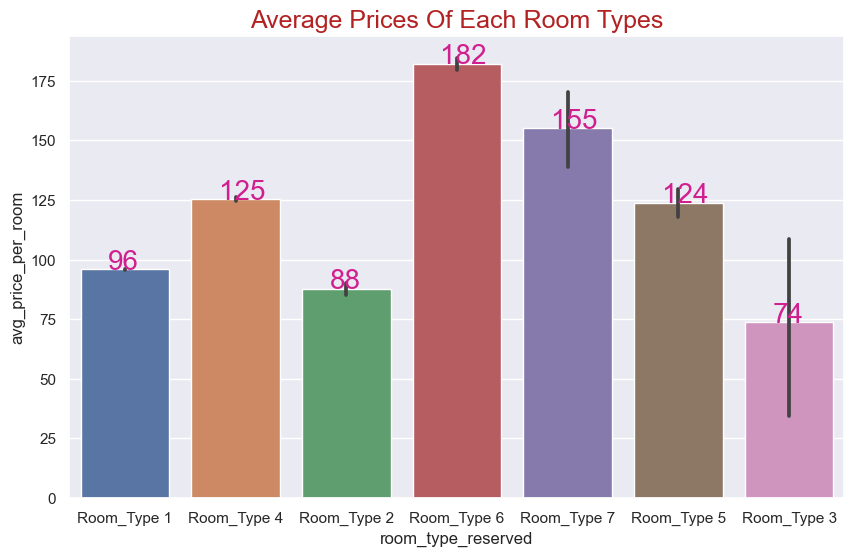

In [87]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data.room_type_reserved, data.avg_price_per_room)
plt.title("Average Prices Of Each Room Types",color="#b22222",fontsize=18);

# Lakin for istifadə edərək qrafikdə istədiyimiz ölçüləri verə bilərik. Əlavə olaraq, hər Room üzrə Average Price sayını göstərə bilərik.
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01),color="#d02090",fontsize=20)

C:\Users\MSI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


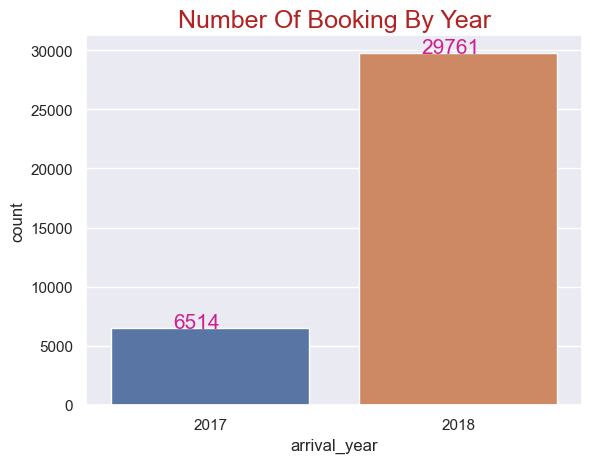

In [88]:
ax = sns.countplot(data.arrival_year)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01),color="#d02090",fontsize=15)
plt.title("Number Of Booking By Year",color="#b22222",fontsize=18);

In [89]:
data.arrival_month.value_counts()

10.0    5321
9.0     4610
8.0     3812
6.0     3202
12.0    3021
11.0    2980
7.0     2920
4.0     2735
5.0     2598
3.0     2358
2.0     1704
1.0     1014
Name: arrival_month, dtype: int64

C:\Users\MSI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


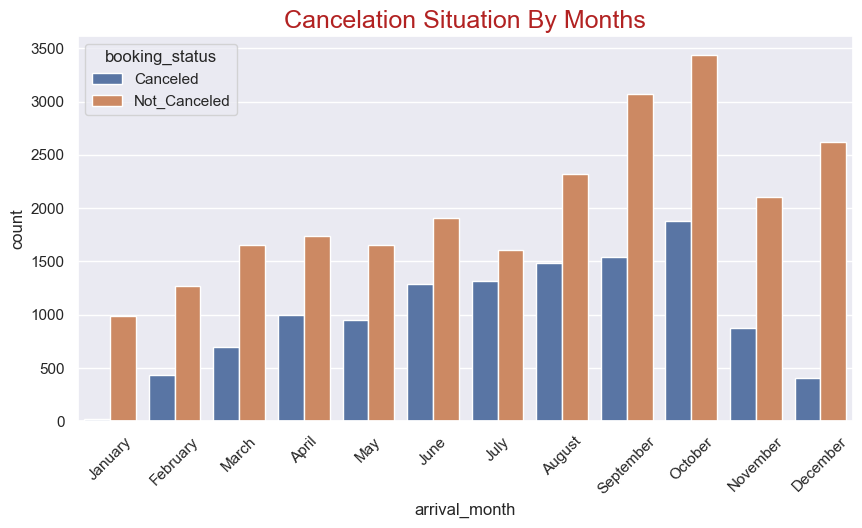

In [90]:
plt.figure(figsize=(10,5))
sns.countplot(data.arrival_month,hue=data.booking_status)
plt.xticks(np.arange(0,12),["January","February","March","April","May","June",
                           "July","August","September","October","November","December"],rotation=45)
plt.title("Cancelation Situation By Months",color="#b22222",fontsize=18);

In [91]:
data['booking_status'] = data['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0})

In [92]:
data['booking_status'].value_counts()

0    24390
1    11885
Name: booking_status, dtype: int64

In [93]:
data1_corr = data.corr()
data2 = pd.DataFrame(data1_corr['booking_status'])
data2

,booking_status
no_of_adults,0.086920
no_of_children,0.033078
no_of_weekend_nights,0.061563
no_of_week_nights,0.092996
required_car_parking_space,-0.086185
lead_time,0.436379
arrival_year,0.179529
arrival_month,-0.011238
arrival_date,0.010629
repeated_guest,-0.107287


<AxesSubplot:>

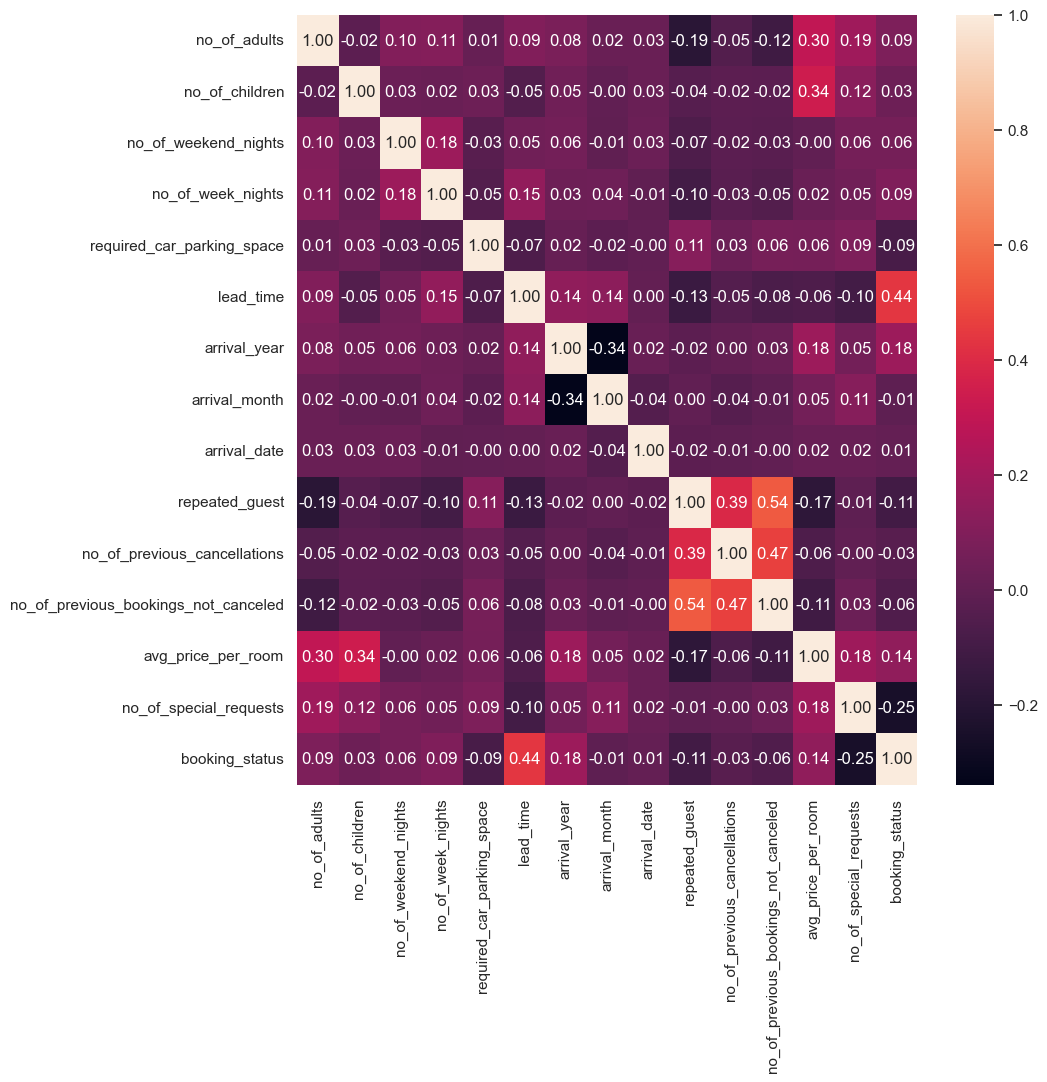

In [94]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True, fmt=".2f")

In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data[['lead_time','arrival_year','repeated_guest','avg_price_per_room','no_of_special_requests']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

vif

,VIF,Features
0,2.039615,lead_time
1,11.956784,arrival_year
2,1.082660,repeated_guest
3,10.403152,avg_price_per_room
4,1.693136,no_of_special_requests


In [96]:
variables = data[['lead_time','repeated_guest','avg_price_per_room','no_of_special_requests']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

vif

,VIF,Features
0,1.743085,lead_time
1,1.014115,repeated_guest
2,2.500524,avg_price_per_room
3,1.675375,no_of_special_requests


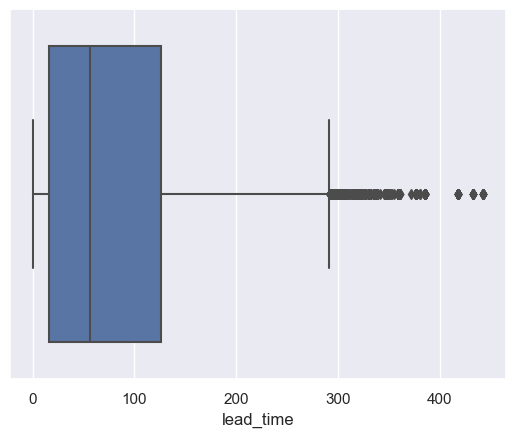

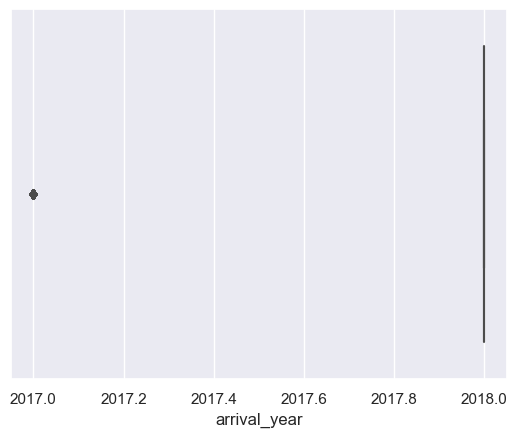

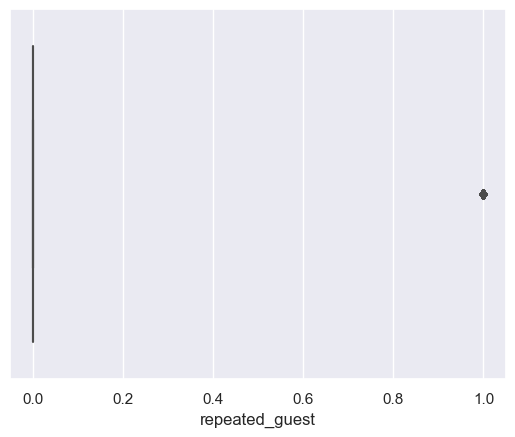

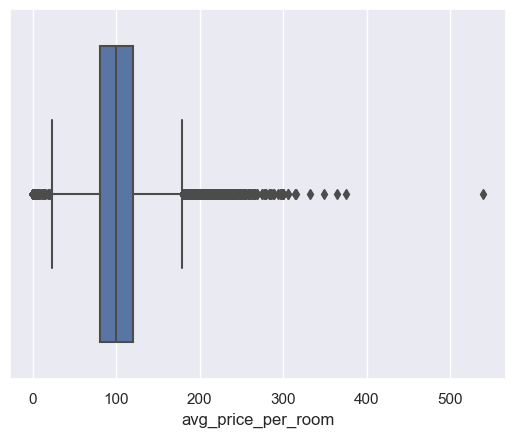

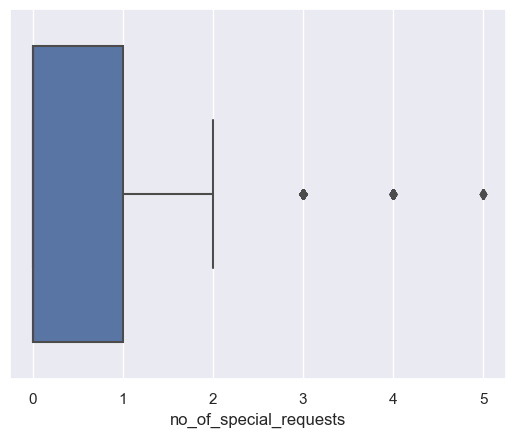

In [97]:
for i in data[['lead_time','arrival_year','repeated_guest','avg_price_per_room','no_of_special_requests']]:
    sns.boxplot(data = data, x = data[i])
    plt.show()

In [98]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

In [99]:
#for i in data[['lead_time','repeated_guest','avg_price_per_room','no_of_special_requests']]:
    #data[i] = np.where(data[i] > Upper[i],Upper[i],data[i])
    #data[i] = np.where(data[i] < Lower[i],Lower[i],data[i])
    #sns.boxplot(x = data[i])
    #plt.show()                    
# Aşağıdakı əməliyyatları etdikdən sonra artıq outlier silinməsinə ehtiyac qalmır.

In [100]:
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00014,1,0,2,0,Meal Plan 1,0,Room_Type 1,95,2018,11.0,20,Online,0,0,0,90.00,2,1
1,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2.0,28,Online,0,0,0,60.00,0,1
2,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12.0,26,Online,0,0,0,105.61,1,0
3,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11.0,6,Online,0,0,0,106.68,1,0
4,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9.0,13,Online,0,0,0,115.00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN34992,2,0,0,1,Meal Plan 1,0,Room_Type 7,0,2017,11.0,5,Complementary,0,0,0,0.00,2,0
36271,INN35028,1,0,0,1,Meal Plan 1,0,Room_Type 1,0,2018,3.0,9,Complementary,1,0,3,0.00,1,0
36272,INN35470,1,0,0,1,Meal Plan 1,0,Room_Type 1,0,2017,9.0,8,Complementary,0,0,0,0.00,0,0
36273,INN35984,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6.0,7,Complementary,1,4,17,0.00,1,0


In [101]:
data.describe(include = 'all')

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
unique,36275,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN
top,INN00014,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,27835,NaN,28130,NaN,NaN,NaN,NaN,23214,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.844962,0.105279,0.810724,2.204300,NaN,0.030986,NaN,84.719476,2017.820427,7.424011,15.596995,NaN,0.025637,0.023349,0.153411,103.423539,0.619655,0.327636
std,NaN,0.518715,0.402648,0.870644,1.410905,NaN,0.173281,NaN,86.030757,0.383836,3.069939,8.740447,NaN,0.158053,0.368331,1.754171,35.089424,0.786236,0.469358
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,2017.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,16.000000,2018.000000,5.000000,8.000000,NaN,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,NaN,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,56.000000,2018.000000,8.000000,16.000000,NaN,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,NaN,2.000000,0.000000,2.000000,3.000000,NaN,0.000000,NaN,126.000000,2018.000000,10.000000,23.000000,NaN,0.000000,0.000000,0.000000,120.000000,1.000000,1.000000


In [102]:
data1=pd.get_dummies(data, prefix=['Type'], columns=['room_type_reserved'], drop_first=True)
data1

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,Type_Room_Type 2,Type_Room_Type 3,Type_Room_Type 4,Type_Room_Type 5,Type_Room_Type 6,Type_Room_Type 7
0,INN00014,1,0,2,0,Meal Plan 1,0,95,2018,11.0,20,Online,0,0,0,90.00,2,1,0,0,0,0,0,0
1,INN00003,1,0,2,1,Meal Plan 1,0,1,2018,2.0,28,Online,0,0,0,60.00,0,1,0,0,0,0,0,0
2,INN00008,2,0,1,3,Meal Plan 1,0,83,2018,12.0,26,Online,0,0,0,105.61,1,0,0,0,1,0,0,0
3,INN00002,2,0,2,3,Not Selected,0,5,2018,11.0,6,Online,0,0,0,106.68,1,0,0,0,0,0,0,0
4,INN00006,2,0,0,2,Meal Plan 2,0,346,2018,9.0,13,Online,0,0,0,115.00,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN34992,2,0,0,1,Meal Plan 1,0,0,2017,11.0,5,Complementary,0,0,0,0.00,2,0,0,0,0,0,0,1
36271,INN35028,1,0,0,1,Meal Plan 1,0,0,2018,3.0,9,Complementary,1,0,3,0.00,1,0,0,0,0,0,0,0
36272,INN35470,1,0,0,1,Meal Plan 1,0,0,2017,9.0,8,Complementary,0,0,0,0.00,0,0,0,0,0,0,0,0
36273,INN35984,1,0,0,1,Meal Plan 1,0,0,2018,6.0,7,Complementary,1,4,17,0.00,1,0,0,0,0,0,0,1


In [103]:
data2=pd.get_dummies(data1, prefix=['Type'], columns=['market_segment_type'], drop_first=True)
data2

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,Type_Room_Type 2,Type_Room_Type 3,Type_Room_Type 4,Type_Room_Type 5,Type_Room_Type 6,Type_Room_Type 7,Type_Complementary,Type_Corporate,Type_Offline,Type_Online
0,INN00014,1,0,2,0,Meal Plan 1,0,95,2018,11.0,20,0,0,0,90.00,2,1,0,0,0,0,0,0,0,0,0,1
1,INN00003,1,0,2,1,Meal Plan 1,0,1,2018,2.0,28,0,0,0,60.00,0,1,0,0,0,0,0,0,0,0,0,1
2,INN00008,2,0,1,3,Meal Plan 1,0,83,2018,12.0,26,0,0,0,105.61,1,0,0,0,1,0,0,0,0,0,0,1
3,INN00002,2,0,2,3,Not Selected,0,5,2018,11.0,6,0,0,0,106.68,1,0,0,0,0,0,0,0,0,0,0,1
4,INN00006,2,0,0,2,Meal Plan 2,0,346,2018,9.0,13,0,0,0,115.00,1,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN34992,2,0,0,1,Meal Plan 1,0,0,2017,11.0,5,0,0,0,0.00,2,0,0,0,0,0,0,1,1,0,0,0
36271,INN35028,1,0,0,1,Meal Plan 1,0,0,2018,3.0,9,1,0,3,0.00,1,0,0,0,0,0,0,0,1,0,0,0
36272,INN35470,1,0,0,1,Meal Plan 1,0,0,2017,9.0,8,0,0,0,0.00,0,0,0,0,0,0,0,0,1,0,0,0
36273,INN35984,1,0,0,1,Meal Plan 1,0,0,2018,6.0,7,1,4,17,0.00,1,0,0,0,0,0,0,1,1,0,0,0


In [104]:
data2['lead_time'].describe()

count    36275.000000
mean        84.719476
std         86.030757
min          0.000000
25%         16.000000
50%         56.000000
75%        126.000000
max        443.000000
Name: lead_time, dtype: float64

In [105]:
data2['lead_time_bins'] = pd.qcut(data2['lead_time'], 5, 
                           labels=['lead_time_lt_-1', 'lead_time_-1_to_100', 'lead_time_100_to_200', 
                                   'lead_time_200_to_300', 'lead_time_gt_300'])

data2

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,Type_Room_Type 2,Type_Room_Type 3,Type_Room_Type 4,Type_Room_Type 5,Type_Room_Type 6,Type_Room_Type 7,Type_Complementary,Type_Corporate,Type_Offline,Type_Online,lead_time_bins
0,INN00014,1,0,2,0,Meal Plan 1,0,95,2018,11.0,20,0,0,0,90.00,2,1,0,0,0,0,0,0,0,0,0,1,lead_time_200_to_300
1,INN00003,1,0,2,1,Meal Plan 1,0,1,2018,2.0,28,0,0,0,60.00,0,1,0,0,0,0,0,0,0,0,0,1,lead_time_lt_-1
2,INN00008,2,0,1,3,Meal Plan 1,0,83,2018,12.0,26,0,0,0,105.61,1,0,0,0,1,0,0,0,0,0,0,1,lead_time_200_to_300
3,INN00002,2,0,2,3,Not Selected,0,5,2018,11.0,6,0,0,0,106.68,1,0,0,0,0,0,0,0,0,0,0,1,lead_time_lt_-1
4,INN00006,2,0,0,2,Meal Plan 2,0,346,2018,9.0,13,0,0,0,115.00,1,1,0,0,0,0,0,0,0,0,0,1,lead_time_gt_300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN34992,2,0,0,1,Meal Plan 1,0,0,2017,11.0,5,0,0,0,0.00,2,0,0,0,0,0,0,1,1,0,0,0,lead_time_lt_-1
36271,INN35028,1,0,0,1,Meal Plan 1,0,0,2018,3.0,9,1,0,3,0.00,1,0,0,0,0,0,0,0,1,0,0,0,lead_time_lt_-1
36272,INN35470,1,0,0,1,Meal Plan 1,0,0,2017,9.0,8,0,0,0,0.00,0,0,0,0,0,0,0,0,1,0,0,0,lead_time_lt_-1
36273,INN35984,1,0,0,1,Meal Plan 1,0,0,2018,6.0,7,1,4,17,0.00,1,0,0,0,0,0,0,1,1,0,0,0,lead_time_lt_-1


In [106]:
data2['avg_price_per_room'].describe()

count    36275.000000
mean       103.423539
std         35.089424
min          0.000000
25%         80.300000
50%         99.450000
75%        120.000000
max        540.000000
Name: avg_price_per_room, dtype: float64

In [107]:
data2['avg_price_per_room_bins'] = pd.qcut(data2['avg_price_per_room'], 5, 
                           labels=['avg_price_per_room_-1', 'avg_price_per_room_-1_to_150', 'avg_price_per_room_150_to_250', 
                                   'avg_price_per_room_250_to_350', 'avg_price_per_room_gt_350'])

data2

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,Type_Room_Type 2,Type_Room_Type 3,Type_Room_Type 4,Type_Room_Type 5,Type_Room_Type 6,Type_Room_Type 7,Type_Complementary,Type_Corporate,Type_Offline,Type_Online,lead_time_bins,avg_price_per_room_bins
0,INN00014,1,0,2,0,Meal Plan 1,0,95,2018,11.0,20,0,0,0,90.00,2,1,0,0,0,0,0,0,0,0,0,1,lead_time_200_to_300,avg_price_per_room_-1_to_150
1,INN00003,1,0,2,1,Meal Plan 1,0,1,2018,2.0,28,0,0,0,60.00,0,1,0,0,0,0,0,0,0,0,0,1,lead_time_lt_-1,avg_price_per_room_-1
2,INN00008,2,0,1,3,Meal Plan 1,0,83,2018,12.0,26,0,0,0,105.61,1,0,0,0,1,0,0,0,0,0,0,1,lead_time_200_to_300,avg_price_per_room_150_to_250
3,INN00002,2,0,2,3,Not Selected,0,5,2018,11.0,6,0,0,0,106.68,1,0,0,0,0,0,0,0,0,0,0,1,lead_time_lt_-1,avg_price_per_room_150_to_250
4,INN00006,2,0,0,2,Meal Plan 2,0,346,2018,9.0,13,0,0,0,115.00,1,1,0,0,0,0,0,0,0,0,0,1,lead_time_gt_300,avg_price_per_room_250_to_350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN34992,2,0,0,1,Meal Plan 1,0,0,2017,11.0,5,0,0,0,0.00,2,0,0,0,0,0,0,1,1,0,0,0,lead_time_lt_-1,avg_price_per_room_-1
36271,INN35028,1,0,0,1,Meal Plan 1,0,0,2018,3.0,9,1,0,3,0.00,1,0,0,0,0,0,0,0,1,0,0,0,lead_time_lt_-1,avg_price_per_room_-1
36272,INN35470,1,0,0,1,Meal Plan 1,0,0,2017,9.0,8,0,0,0,0.00,0,0,0,0,0,0,0,0,1,0,0,0,lead_time_lt_-1,avg_price_per_room_-1
36273,INN35984,1,0,0,1,Meal Plan 1,0,0,2018,6.0,7,1,4,17,0.00,1,0,0,0,0,0,0,1,1,0,0,0,lead_time_lt_-1,avg_price_per_room_-1


In [108]:
data2['repeated_guest'].describe() 

count    36275.000000
mean         0.025637
std          0.158053
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: repeated_guest, dtype: float64

In [109]:
data2['repeated_guest'].value_counts() 

0    35345
1      930
Name: repeated_guest, dtype: int64

In [110]:
data3=pd.get_dummies(data2, prefix=['Type'], columns=['avg_price_per_room_bins'], drop_first=True)
data3

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,Type_Room_Type 2,Type_Room_Type 3,Type_Room_Type 4,Type_Room_Type 5,Type_Room_Type 6,Type_Room_Type 7,Type_Complementary,Type_Corporate,Type_Offline,Type_Online,lead_time_bins,Type_avg_price_per_room_-1_to_150,Type_avg_price_per_room_150_to_250,Type_avg_price_per_room_250_to_350,Type_avg_price_per_room_gt_350
0,INN00014,1,0,2,0,Meal Plan 1,0,95,2018,11.0,20,0,0,0,90.00,2,1,0,0,0,0,0,0,0,0,0,1,lead_time_200_to_300,1,0,0,0
1,INN00003,1,0,2,1,Meal Plan 1,0,1,2018,2.0,28,0,0,0,60.00,0,1,0,0,0,0,0,0,0,0,0,1,lead_time_lt_-1,0,0,0,0
2,INN00008,2,0,1,3,Meal Plan 1,0,83,2018,12.0,26,0,0,0,105.61,1,0,0,0,1,0,0,0,0,0,0,1,lead_time_200_to_300,0,1,0,0
3,INN00002,2,0,2,3,Not Selected,0,5,2018,11.0,6,0,0,0,106.68,1,0,0,0,0,0,0,0,0,0,0,1,lead_time_lt_-1,0,1,0,0
4,INN00006,2,0,0,2,Meal Plan 2,0,346,2018,9.0,13,0,0,0,115.00,1,1,0,0,0,0,0,0,0,0,0,1,lead_time_gt_300,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN34992,2,0,0,1,Meal Plan 1,0,0,2017,11.0,5,0,0,0,0.00,2,0,0,0,0,0,0,1,1,0,0,0,lead_time_lt_-1,0,0,0,0
36271,INN35028,1,0,0,1,Meal Plan 1,0,0,2018,3.0,9,1,0,3,0.00,1,0,0,0,0,0,0,0,1,0,0,0,lead_time_lt_-1,0,0,0,0
36272,INN35470,1,0,0,1,Meal Plan 1,0,0,2017,9.0,8,0,0,0,0.00,0,0,0,0,0,0,0,0,1,0,0,0,lead_time_lt_-1,0,0,0,0
36273,INN35984,1,0,0,1,Meal Plan 1,0,0,2018,6.0,7,1,4,17,0.00,1,0,0,0,0,0,0,1,1,0,0,0,lead_time_lt_-1,0,0,0,0


In [111]:
data4=pd.get_dummies(data3, prefix=['Type'], columns=['lead_time_bins'], drop_first=True)
data4

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,Type_Room_Type 2,Type_Room_Type 3,Type_Room_Type 4,Type_Room_Type 5,Type_Room_Type 6,Type_Room_Type 7,Type_Complementary,Type_Corporate,Type_Offline,Type_Online,Type_avg_price_per_room_-1_to_150,Type_avg_price_per_room_150_to_250,Type_avg_price_per_room_250_to_350,Type_avg_price_per_room_gt_350,Type_lead_time_-1_to_100,Type_lead_time_100_to_200,Type_lead_time_200_to_300,Type_lead_time_gt_300
0,INN00014,1,0,2,0,Meal Plan 1,0,95,2018,11.0,20,0,0,0,90.00,2,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
1,INN00003,1,0,2,1,Meal Plan 1,0,1,2018,2.0,28,0,0,0,60.00,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,INN00008,2,0,1,3,Meal Plan 1,0,83,2018,12.0,26,0,0,0,105.61,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
3,INN00002,2,0,2,3,Not Selected,0,5,2018,11.0,6,0,0,0,106.68,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,INN00006,2,0,0,2,Meal Plan 2,0,346,2018,9.0,13,0,0,0,115.00,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN34992,2,0,0,1,Meal Plan 1,0,0,2017,11.0,5,0,0,0,0.00,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
36271,INN35028,1,0,0,1,Meal Plan 1,0,0,2018,3.0,9,1,0,3,0.00,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
36272,INN35470,1,0,0,1,Meal Plan 1,0,0,2017,9.0,8,0,0,0,0.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
36273,INN35984,1,0,0,1,Meal Plan 1,0,0,2018,6.0,7,1,4,17,0.00,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0


In [112]:
data4['arrival_year'] = data4['arrival_year'].map({2018: 1, 2017: 0})

data4

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,Type_Room_Type 2,Type_Room_Type 3,Type_Room_Type 4,Type_Room_Type 5,Type_Room_Type 6,Type_Room_Type 7,Type_Complementary,Type_Corporate,Type_Offline,Type_Online,Type_avg_price_per_room_-1_to_150,Type_avg_price_per_room_150_to_250,Type_avg_price_per_room_250_to_350,Type_avg_price_per_room_gt_350,Type_lead_time_-1_to_100,Type_lead_time_100_to_200,Type_lead_time_200_to_300,Type_lead_time_gt_300
0,INN00014,1,0,2,0,Meal Plan 1,0,95,1,11.0,20,0,0,0,90.00,2,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
1,INN00003,1,0,2,1,Meal Plan 1,0,1,1,2.0,28,0,0,0,60.00,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,INN00008,2,0,1,3,Meal Plan 1,0,83,1,12.0,26,0,0,0,105.61,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
3,INN00002,2,0,2,3,Not Selected,0,5,1,11.0,6,0,0,0,106.68,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,INN00006,2,0,0,2,Meal Plan 2,0,346,1,9.0,13,0,0,0,115.00,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN34992,2,0,0,1,Meal Plan 1,0,0,0,11.0,5,0,0,0,0.00,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
36271,INN35028,1,0,0,1,Meal Plan 1,0,0,1,3.0,9,1,0,3,0.00,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
36272,INN35470,1,0,0,1,Meal Plan 1,0,0,0,9.0,8,0,0,0,0.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
36273,INN35984,1,0,0,1,Meal Plan 1,0,0,1,6.0,7,1,4,17,0.00,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0


In [113]:
data5=pd.get_dummies(data4, prefix=['Type'], columns=['type_of_meal_plan'], drop_first=True)
data5

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,Type_Room_Type 2,Type_Room_Type 3,Type_Room_Type 4,Type_Room_Type 5,Type_Room_Type 6,Type_Room_Type 7,Type_Complementary,Type_Corporate,Type_Offline,Type_Online,Type_avg_price_per_room_-1_to_150,Type_avg_price_per_room_150_to_250,Type_avg_price_per_room_250_to_350,Type_avg_price_per_room_gt_350,Type_lead_time_-1_to_100,Type_lead_time_100_to_200,Type_lead_time_200_to_300,Type_lead_time_gt_300,Type_Meal Plan 2,Type_Meal Plan 3,Type_Not Selected
0,INN00014,1,0,2,0,0,95,1,11.0,20,0,0,0,90.00,2,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
1,INN00003,1,0,2,1,0,1,1,2.0,28,0,0,0,60.00,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,INN00008,2,0,1,3,0,83,1,12.0,26,0,0,0,105.61,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
3,INN00002,2,0,2,3,0,5,1,11.0,6,0,0,0,106.68,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
4,INN00006,2,0,0,2,0,346,1,9.0,13,0,0,0,115.00,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN34992,2,0,0,1,0,0,0,11.0,5,0,0,0,0.00,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36271,INN35028,1,0,0,1,0,0,1,3.0,9,1,0,3,0.00,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36272,INN35470,1,0,0,1,0,0,0,9.0,8,0,0,0,0.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36273,INN35984,1,0,0,1,0,0,1,6.0,7,1,4,17,0.00,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [114]:
data['no_of_weekend_nights'].value_counts()

0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64

In [115]:
data['no_of_week_nights'].value_counts()

2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: no_of_week_nights, dtype: int64

In [116]:
data['no_of_week_nights'].describe()

count    36275.000000
mean         2.204300
std          1.410905
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         17.000000
Name: no_of_week_nights, dtype: float64

In [117]:
from sklearn.decomposition import PCA   # Ətraflı məlumatı aşağıdakı ünvan üzərindən əldə edə bilərsiniz 
# https://habr.com/ru/post/304214/   
# https://runebook.dev/ru/docs/scikit_learn/modules/generated/sklearn.decomposition.pca
pca=PCA(n_components=1)
pca_no_people=pca.fit_transform(data5[["no_of_adults","no_of_children"]])
data5["no_of_people"]=pca_no_people

data5.drop(columns=["no_of_adults","no_of_children"],inplace=True)

data5

,Booking_ID,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,Type_Room_Type 2,Type_Room_Type 3,Type_Room_Type 4,Type_Room_Type 5,Type_Room_Type 6,Type_Room_Type 7,Type_Complementary,Type_Corporate,Type_Offline,Type_Online,Type_avg_price_per_room_-1_to_150,Type_avg_price_per_room_150_to_250,Type_avg_price_per_room_250_to_350,Type_avg_price_per_room_gt_350,Type_lead_time_-1_to_100,Type_lead_time_100_to_200,Type_lead_time_200_to_300,Type_lead_time_gt_300,Type_Meal Plan 2,Type_Meal Plan 3,Type_Not Selected,no_of_people
0,INN00014,2,0,0,95,1,11.0,20,0,0,0,90.00,2,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,-0.840274
1,INN00003,2,1,0,1,1,2.0,28,0,0,0,60.00,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-0.840274
2,INN00008,1,3,0,83,1,12.0,26,0,0,0,105.61,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0.158982
3,INN00002,2,3,0,5,1,11.0,6,0,0,0,106.68,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0.158982
4,INN00006,0,2,0,346,1,9.0,13,0,0,0,115.00,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0.158982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN34992,0,1,0,0,0,11.0,5,0,0,0,0.00,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.158982
36271,INN35028,0,1,0,0,1,3.0,9,1,0,3,0.00,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.840274
36272,INN35470,0,1,0,0,0,9.0,8,0,0,0,0.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.840274
36273,INN35984,0,1,0,0,1,6.0,7,1,4,17,0.00,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.840274


In [118]:
pca_no_week=pca.fit_transform(data5[["no_of_weekend_nights","no_of_week_nights"]])
data5["no_of_week_days"]=pca_no_week

data5.drop(columns=["no_of_weekend_nights","no_of_week_nights"],inplace=True)

data5

,Booking_ID,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,Type_Room_Type 2,Type_Room_Type 3,Type_Room_Type 4,Type_Room_Type 5,Type_Room_Type 6,Type_Room_Type 7,Type_Complementary,Type_Corporate,Type_Offline,Type_Online,Type_avg_price_per_room_-1_to_150,Type_avg_price_per_room_150_to_250,Type_avg_price_per_room_250_to_350,Type_avg_price_per_room_gt_350,Type_lead_time_-1_to_100,Type_lead_time_100_to_200,Type_lead_time_200_to_300,Type_lead_time_gt_300,Type_Meal Plan 2,Type_Meal Plan 3,Type_Not Selected,no_of_people,no_of_week_days
0,INN00014,0,95,1,11.0,20,0,0,0,90.00,2,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,-0.840274,-1.968449
1,INN00003,0,1,1,2.0,28,0,0,0,60.00,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-0.840274,-0.983180
2,INN00008,0,83,1,12.0,26,0,0,0,105.61,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0.158982,0.816347
3,INN00002,0,5,1,11.0,6,0,0,0,106.68,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0.158982,0.987358
4,INN00006,0,346,1,9.0,13,0,0,0,115.00,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0.158982,-0.339934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN34992,0,0,0,11.0,5,0,0,0,0.00,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.158982,-1.325203
36271,INN35028,0,0,1,3.0,9,1,0,3,0.00,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.840274,-1.325203
36272,INN35470,0,0,0,9.0,8,0,0,0,0.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.840274,-1.325203
36273,INN35984,0,0,1,6.0,7,1,4,17,0.00,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.840274,-1.325203


In [119]:
data5.columns

Index(['Booking_ID', 'required_car_parking_space', 'lead_time', 'arrival_year',
       'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'Type_Room_Type 2', 'Type_Room_Type 3', 'Type_Room_Type 4',
       'Type_Room_Type 5', 'Type_Room_Type 6', 'Type_Room_Type 7',
       'Type_Complementary', 'Type_Corporate', 'Type_Offline', 'Type_Online',
       'Type_avg_price_per_room_-1_to_150',
       'Type_avg_price_per_room_150_to_250',
       'Type_avg_price_per_room_250_to_350', 'Type_avg_price_per_room_gt_350',
       'Type_lead_time_-1_to_100', 'Type_lead_time_100_to_200',
       'Type_lead_time_200_to_300', 'Type_lead_time_gt_300',
       'Type_Meal Plan 2', 'Type_Meal Plan 3', 'Type_Not Selected',
       'no_of_people', 'no_of_week_days'],
      dtype='object')

In [120]:
cols = ['Booking_ID','required_car_parking_space', 'lead_time','arrival_month', 'arrival_date', 
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room','repeated_guest','arrival_year' ,'no_of_special_requests', 'booking_status',
       'Type_Room_Type 2', 'Type_Room_Type 3', 'Type_Room_Type 4',
       'Type_Room_Type 5', 'Type_Room_Type 6', 'Type_Room_Type 7',
       'Type_Complementary', 'Type_Corporate', 'Type_Offline', 'Type_Online',
       'Type_avg_price_per_room_-1_to_150',
       'Type_avg_price_per_room_150_to_250',
       'Type_avg_price_per_room_250_to_350', 'Type_avg_price_per_room_gt_350',
       'Type_lead_time_-1_to_100', 'Type_lead_time_100_to_200',
       'Type_lead_time_200_to_300', 'Type_lead_time_gt_300',
       'Type_Meal Plan 2', 'Type_Meal Plan 3', 'Type_Not Selected', 'no_of_people', 'no_of_week_days']


data6= data5[cols]

data6

,Booking_ID,required_car_parking_space,lead_time,arrival_month,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,repeated_guest,arrival_year,no_of_special_requests,booking_status,Type_Room_Type 2,Type_Room_Type 3,Type_Room_Type 4,Type_Room_Type 5,Type_Room_Type 6,Type_Room_Type 7,Type_Complementary,Type_Corporate,Type_Offline,Type_Online,Type_avg_price_per_room_-1_to_150,Type_avg_price_per_room_150_to_250,Type_avg_price_per_room_250_to_350,Type_avg_price_per_room_gt_350,Type_lead_time_-1_to_100,Type_lead_time_100_to_200,Type_lead_time_200_to_300,Type_lead_time_gt_300,Type_Meal Plan 2,Type_Meal Plan 3,Type_Not Selected,no_of_people,no_of_week_days
0,INN00014,0,95,11.0,20,0,0,90.00,0,1,2,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,-0.840274,-1.968449
1,INN00003,0,1,2.0,28,0,0,60.00,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-0.840274,-0.983180
2,INN00008,0,83,12.0,26,0,0,105.61,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0.158982,0.816347
3,INN00002,0,5,11.0,6,0,0,106.68,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0.158982,0.987358
4,INN00006,0,346,9.0,13,0,0,115.00,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0.158982,-0.339934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN34992,0,0,11.0,5,0,0,0.00,0,0,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.158982,-1.325203
36271,INN35028,0,0,3.0,9,0,3,0.00,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.840274,-1.325203
36272,INN35470,0,0,9.0,8,0,0,0.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.840274,-1.325203
36273,INN35984,0,0,6.0,7,4,17,0.00,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.840274,-1.325203


In [121]:
data_final = data6.iloc[:,8:]

data_final

,repeated_guest,arrival_year,no_of_special_requests,booking_status,Type_Room_Type 2,Type_Room_Type 3,Type_Room_Type 4,Type_Room_Type 5,Type_Room_Type 6,Type_Room_Type 7,Type_Complementary,Type_Corporate,Type_Offline,Type_Online,Type_avg_price_per_room_-1_to_150,Type_avg_price_per_room_150_to_250,Type_avg_price_per_room_250_to_350,Type_avg_price_per_room_gt_350,Type_lead_time_-1_to_100,Type_lead_time_100_to_200,Type_lead_time_200_to_300,Type_lead_time_gt_300,Type_Meal Plan 2,Type_Meal Plan 3,Type_Not Selected,no_of_people,no_of_week_days
0,0,1,2,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,-0.840274,-1.968449
1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-0.840274,-0.983180
2,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0.158982,0.816347
3,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0.158982,0.987358
4,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0.158982,-0.339934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,0,0,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.158982,-1.325203
36271,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.840274,-1.325203
36272,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.840274,-1.325203
36273,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.840274,-1.325203


# Model Log_Reg

In [122]:
x = data_final.drop('booking_status' ,axis = 1)
y = data_final['booking_status']

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [132]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [135]:
models = [LogisticRegression(), RandomForestClassifier(random_state = 42), KNeighborsClassifier(),svm.SVC(probability=True)]

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Performance for LogisticRegression()
Accuracy is 81.63190296793164
Confusion matrix [[6579  734]
 [1265 2305]]
AUC Score: 77.26445288904567
Gini pred is 54.52890577809135
Gini prob is 72.02701455257339


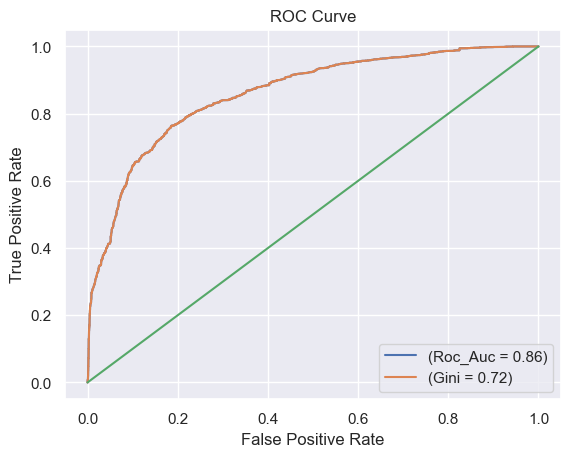

Model Performance for RandomForestClassifier(random_state=42)
Accuracy is 85.10520996048884
Confusion matrix [[6603  710]
 [ 911 2659]]
AUC Score: 82.38652742650459
Gini pred is 64.77305485300917
Gini prob is 81.11608160288593


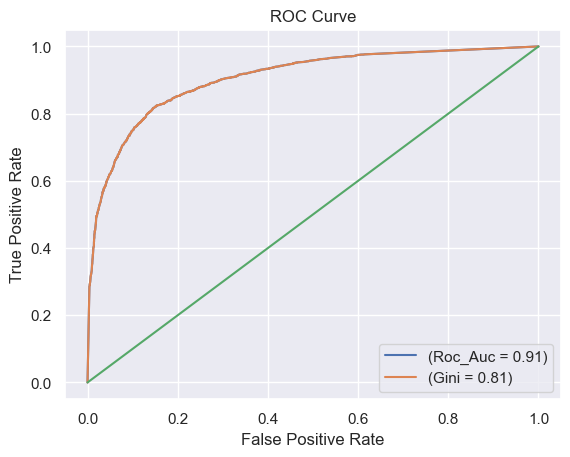

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Model Performance for KNeighborsClassifier()
Accuracy is 84.31498667646788
Confusion matrix [[6602  711]
 [ 996 2574]]
AUC Score: 81.1892140966875
Gini pred is 62.37842819337498
Gini prob is 77.46452443961314


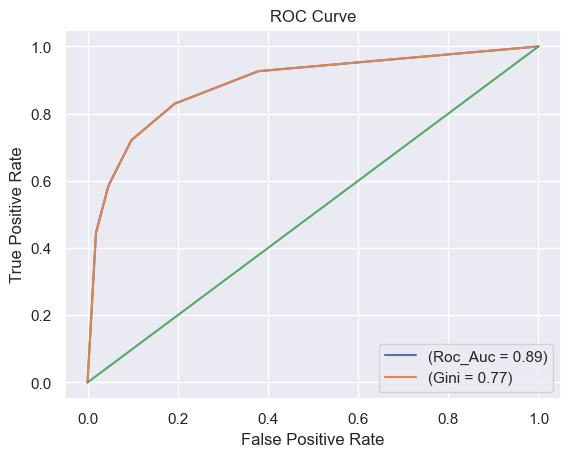

Model Performance for SVC(probability=True)
Accuracy is 84.44362767619222
Confusion matrix [[6621  692]
 [1001 2569]]
AUC Score: 81.24909173296011
Gini pred is 62.49818346592022
Gini prob is 77.6991513137458


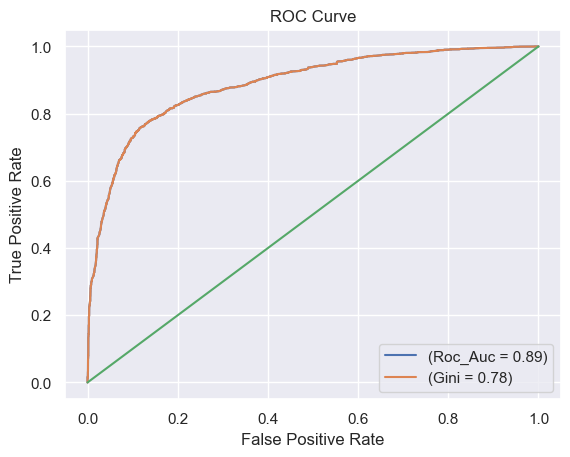

In [136]:
for i in models:
    models=i
    models.fit(X_train, y_train)
    y_pred = models.predict(X_test)
    y_prob = models.predict_proba(X_test)[:,1]

    roc_pred = roc_auc_score(y_test, y_pred)
    roc_prob = roc_auc_score(y_test, y_prob)
    
    gini_pred = roc_pred*2-1
    gini_prob = roc_prob*2-1
    gini = (2*roc_auc_score(y_test, y_prob))-1
    
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)*100
    
    
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure()
    
    plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_prob)
    plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
    plt.plot([0, 1], [0, 1])
    plt.xlim()
    plt.ylim()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    
    
    print('Model Performance for',i)
    print('Accuracy is', accuracy)
    print('Confusion matrix',confusion_matrix)
    print("="*70)
    print('AUC Score:', roc_auc_score(y_test, y_pred)*100)
    print('Gini pred is', gini_pred*100)
    print('Gini prob is', gini_prob*100)
    plt.show()
    print("="*70)

In [94]:
y_pred = reg.predict(X_test)

In [95]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[6579,  734],
       [1265, 2305]], dtype=int64)

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      7313
           1       0.76      0.65      0.70      3570

    accuracy                           0.82     10883
   macro avg       0.80      0.77      0.78     10883
weighted avg       0.81      0.82      0.81     10883



In [97]:
from sklearn.metrics import roc_auc_score


print('AUC Score:', roc_auc_score(y_test, y_pred)*100)

AUC Score: 77.26445288904567


In [98]:
Gini = (roc_auc_score(y_test, y_pred)*2)-1
Gini

0.5452890577809135

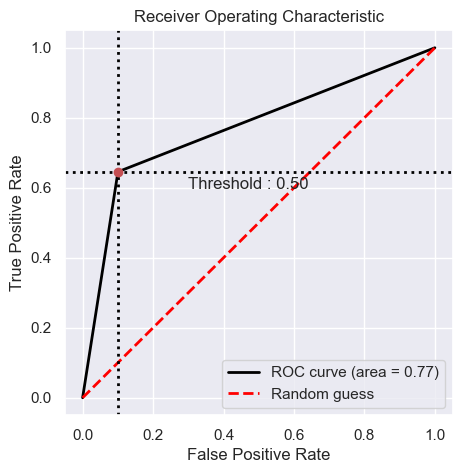

In [99]:
from plot_metric.functions import BinaryClassification

bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])


plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [100]:
y_pred2=reg.predict_proba(X_test)

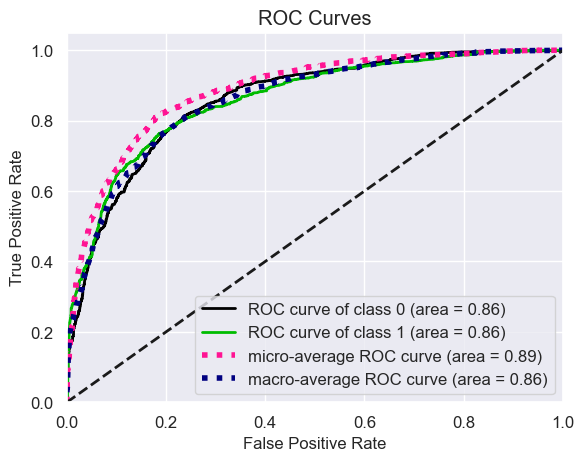

In [101]:
import matplotlib.pyplot as plt

import scikitplot as skplt

skplt.metrics.plot_roc(y_test, y_pred2)
plt.show()

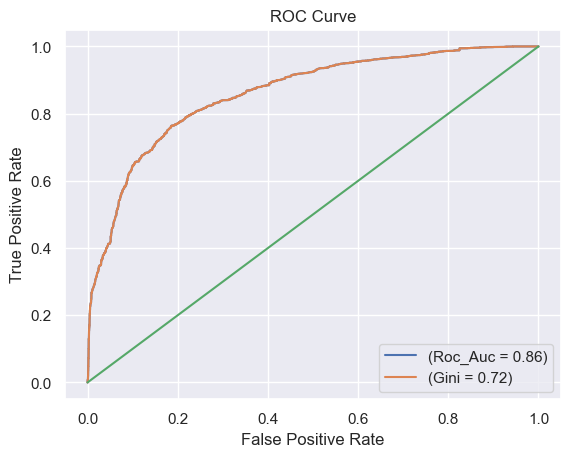

In [102]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = reg.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

# Build Random Forest classification

In [262]:
from sklearn.ensemble import RandomForestClassifier

In [263]:
regRF = RandomForestClassifier()

In [264]:
regRF.fit(X_train, y_train)

RandomForestClassifier()

In [265]:
y_predRF = regRF.predict(X_test)

In [266]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predRF)
confusion_matrix

array([[6608,  705],
       [ 893, 2677]], dtype=int64)

<AxesSubplot:>

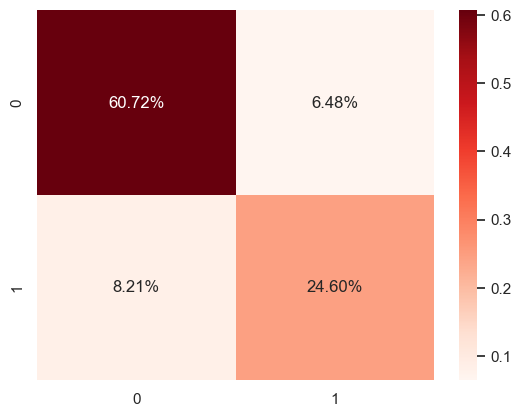

In [267]:
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%', cmap='Reds')

In [268]:
print(classification_report(y_test, y_predRF))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      7313
           1       0.79      0.75      0.77      3570

    accuracy                           0.85     10883
   macro avg       0.84      0.83      0.83     10883
weighted avg       0.85      0.85      0.85     10883



In [269]:
from sklearn.metrics import roc_auc_score


print('AUC Score:', roc_auc_score(y_test, y_predRF)*100)

AUC Score: 82.67281396354522


In [270]:
Gini = (roc_auc_score(y_test, y_predRF)*2)-1
Gini

0.6534562792709044

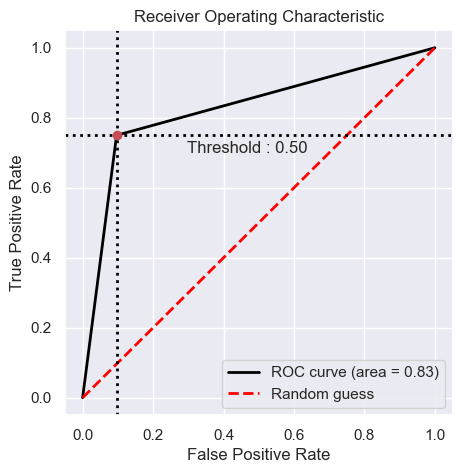

In [271]:
from plot_metric.functions import BinaryClassification

bc = BinaryClassification(y_test, y_predRF, labels=["Class 1", "Class 2"])


plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [272]:
y_predRF2=regRF.predict_proba(X_test)

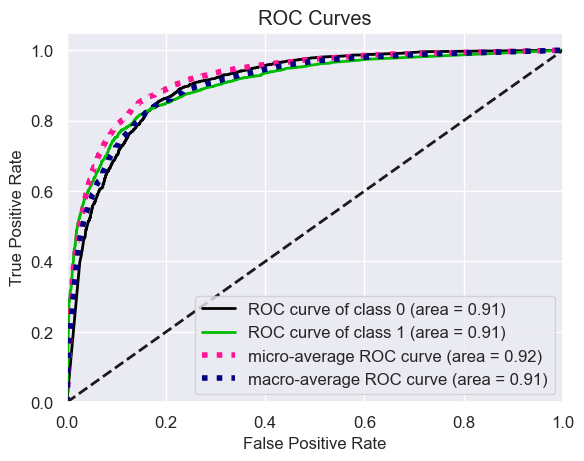

In [273]:
import scikitplot as skplt

skplt.metrics.plot_roc(y_test, y_predRF2)
plt.show()

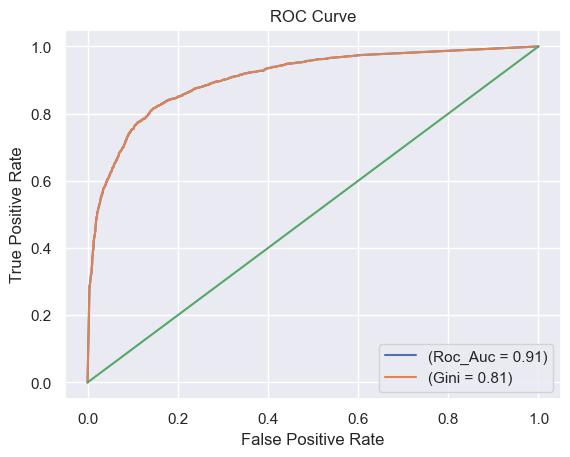

In [274]:
y_probRF = regRF.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_probRF)
gini = (2*roc_auc_score(y_test, y_probRF))-1

fpr, tpr, thresholds = roc_curve(y_test, y_probRF)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

# Support Vector Machines Clasification

In [103]:
from sklearn import svm

In [104]:
regSVC = svm.SVC(probability=True)

In [ ]:
regSVC.fit(X_train, y_train)

In [ ]:
y_predSVC = regSVC.predict(X_test)

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predSVC)
confusion_matrix

In [ ]:
print(classification_report(y_test, y_predSVC))

In [104]:
print('AUC Score:', roc_auc_score(y_test, y_predSVC)*100)

AUC Score: 81.24909173296011


In [105]:
Gini = (roc_auc_score(y_test, y_predSVC)*2)-1
Gini

0.6249818346592022

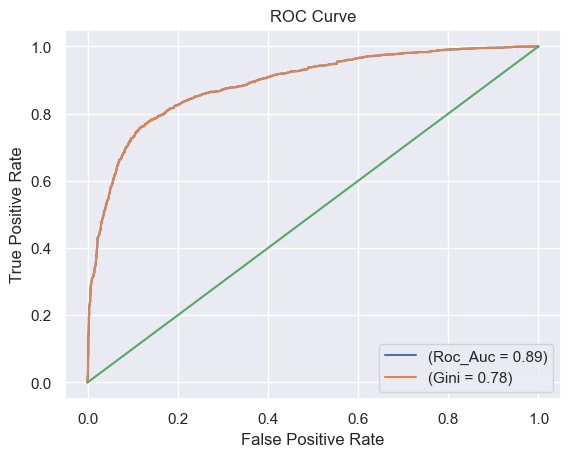

In [108]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


y_probSVC = regSVC.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_probSVC)
gini = (2*roc_auc_score(y_test, y_probSVC))-1

fpr, tpr, thresholds = roc_curve(y_test, y_probSVC)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

In [2]:
from sklearn.model_selection import RandomizedSearchCV


kernel = ['linear', 'poly', 'rbf', 'sigmoid']
# kernel trick

gamma = ['scale', 'auto'] 
#Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

#if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma
#if ‘auto’, uses 1 / n_features.

C = [1, 10, 100, 1e3, 1e4, 1e5, 1e6]
# Must be strictly positive.

 # epsilon = [0.1 , 0.01, 0.001, 0.0001]


# Create the random grid
random_grid = {'kernel': kernel,
               'gamma': gamma,
               'C': C}
print(random_grid)

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto'], 'C': [1, 10, 100, 1000.0, 10000.0, 100000.0, 1000000.0]}


In [ ]:
svr_random = RandomizedSearchCV(estimator = regSVC, param_distributions = random_grid, n_iter = 1, cv = 3, verbose=1, n_jobs = -1)
# Fit the random search model
svr_random.fit(X_train, y_train)

# Build Random Forest classification with hyperparameter optimization

In [124]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000 , num = 50)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 200 , num = 20)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]



random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [10, 26, 42, 58, 74, 90, 106, 122, 138, 155, 171, 187, 203, 219, 235, 251, 267, 284, 300, 316, 332, 348, 364, 380, 396, 413, 429, 445, 461, 477, 493, 509, 525, 542, 558, 574, 590, 606, 622, 638, 654, 671, 687, 703, 719, 735, 751, 767, 783, 800], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [140]:
rf_random = RandomizedSearchCV(estimator = regRF, param_distributions = random_grid, n_iter = 500, cv = 3, verbose=1, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=500,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 11, 13, 15, 17, 19,
                                                      21, 23, 25, 27, 29, 31,
                                                      33, 34, 36, 38, 40, 42,
                                                      44, 46, 48, 50, 52, 54,
                                                      56, 57, 59, 61, 63, 65, ...],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 26, 42, 58, 74, 90,
                                                         106, 122, 138, 155,
                                                         171, 187, 203, 219,
                                                

In [151]:
rf_random.best_params_

{'n_estimators': 783,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 17}

In [152]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    roc_pred = roc_auc_score(y_test, y_pred)
    roc_prob = roc_auc_score(y_test, y_prob)
    
    gini_pred = roc_pred*2-1
    gini_prob = roc_prob*2-1
    
    print('Model Performance')

    print('Gini pred is', gini_pred*100)
    print('Gini prob is', gini_prob*100)
    
    return gini_pred
    return gini_prob

In [153]:
optimized_model = rf_random.best_estimator_
optmized_accuracy = evaluate(optimized_model, X_test, y_test)

Model Performance
Gini pred is 65.80874548643467
Gini prob is 83.90672992839964
